# STAT 301 Project Proposal: Quantifying Student Performance #

#### Group 24: Selena Shew, Jasmeher Kathuria, Kratika Rathi, Alex Bastin ####

<img src="https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/blogs/11850/images/kNMw76DRQOG9VtC7yyG3_students-responding-to-task-cards-iin-class.png" alt="Picture of children studying" width=40%>

## 1. Introduction ##

Understanding the factors that determine student performance throughout various stages of education is a worthy yet challenging task. A comprehensive model of student performance would enable educators to help struggling students perform better and continue pursuing education, which has broad societal benefits. 

The primary nature of this project is prediction  as we try to predict whether or not a student fails a class using a subset of variables from the dataset. The dataset selected contains 650 grades achieved in across two Portugese high schools in a Portugese class accompanied by a diverse set of factors that attempt to contextualize a given student's performance. It was collected by Cortez, P., &amp; Silva, A. (2008) by using school reports and questionnaires completed by students. Variables we may consider for this prediction question include degree of internet access, study time, or degree of socialization. An important precursor to this study is the feature selection process which is necessary given an abundance of predictor variables. 

Prior to leveraging feature selection methods, we instead use a literary research-based approach to find variables relevant to a student's performance and decrease the dimensionality of our data. Through reading studies Klein et al., (2022), Moos & Moos (1978), and Pellerin (2005) we compile a list of variables that quantify the factors mentioned in the literature. We offer an overview of these relevant predictor variables and the target below.

| Name | Description | Type |
| --- | --- | --- |
| Romantic | Whether or not a student is involved in a romantic relationship | Categorical (binary) |
| Studytime | Weekly study time | Continuous |
| Goout | Going out with friends | Continuous (scale of 1 to 5) | 
| Internet | Whether or not the student has access to the internet | Categorical (binary) |
| Absences | Number of school absences | Continuous |
| Failure | Whether or not the student failed the class | Categorical (binary) |

## 2. Preliminary Results ##

We start by loading necessary packages

In [31]:
# loading necessary packages
library(broom)
library(tidyverse)
library(GGally)
library(ggplot2)

Here we read our data from the online source of the UCI Machine Learning repository. This ensures our project is easily reproducible as the data does not have to be included.

In [21]:
temp <- tempfile(fileext = ".zip")
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip",
  temp)
out <- unzip(temp, exdir = tempdir())
data <- read.csv(out[2], sep = ";") # out[2] represents the portugese grades
head(data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


Now we check for any missing values

In [22]:
apply(data, 2, function(x) any(is.na(x)))

school        sex        age    address    famsize    Pstatus       Medu 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
      Fedu       Mjob       Fjob     reason   guardian traveltime  studytime 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  failures  schoolsup     famsup       paid activities    nursery     higher 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
  internet   romantic     famrel   freetime      goout       Dalc       Walc 
     FALSE      FALSE      FALSE      FALSE      FALSE      FALSE      FALSE 
    health   absences         G1         G2         G3 
     FALSE      FALSE      FALSE      FALSE      FALSE

Since all the results are FALSE in the above code snippet, this confirms we don't have any missing or "NA" values in our dataset

In [23]:
colnames(data) #checking the column names within the data

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

Using the findings of the aformentioned research papers, we select the relevant variables for our preliminary analysis. Later in this project, we use quantitative feature selection methods, like forward and backward selection.

In [24]:
data_prelim <- data %>%
    select(failures, romantic, studytime, goout, internet, absences)

In [25]:
head(data_prelim)

,failures,romantic,studytime,goout,internet,absences
,<int>,<chr>,<int>,<int>,<chr>,<int>
1,0,no,2,4,no,4
2,0,no,2,3,yes,2
3,0,no,2,2,yes,6
4,0,yes,3,2,yes,0
5,0,no,2,2,no,0
6,0,no,2,2,yes,6


Here we use ggpairs() to visualize the relationships in the data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



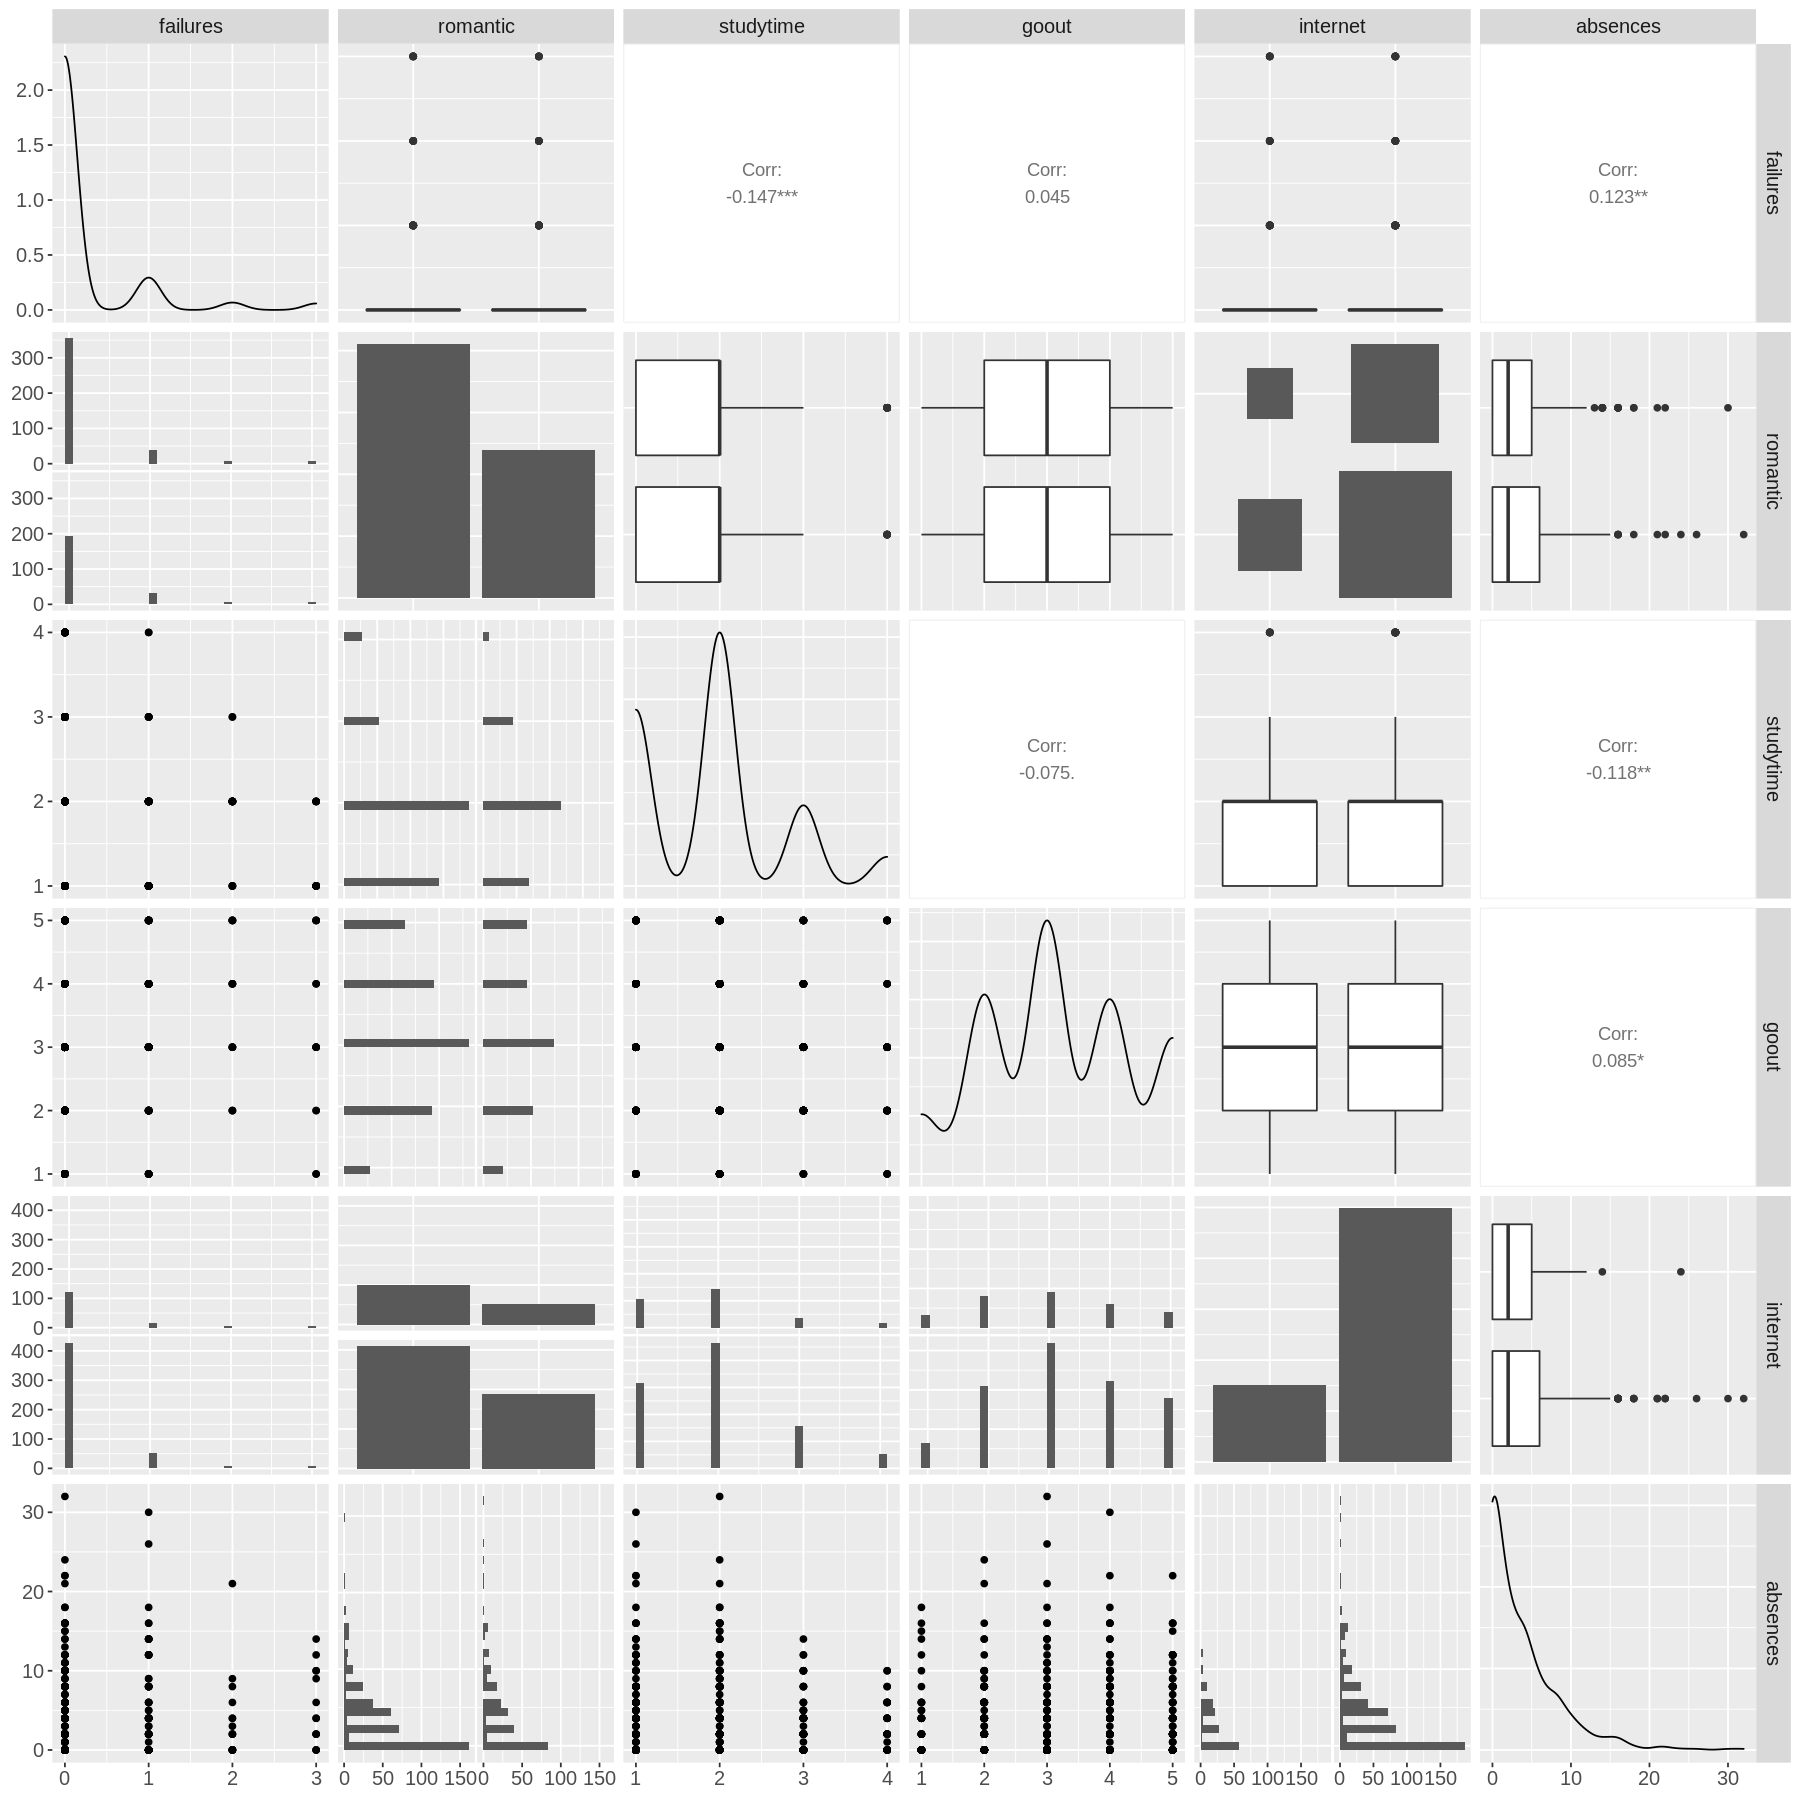

In [26]:
options(repr.plot.width = 15, repr.plot.height = 15)

student_perform_pairplots <- data_prelim %>%
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
student_perform_pairplots

Now we visualize the distribution of our target variable, the number of failed classes per student

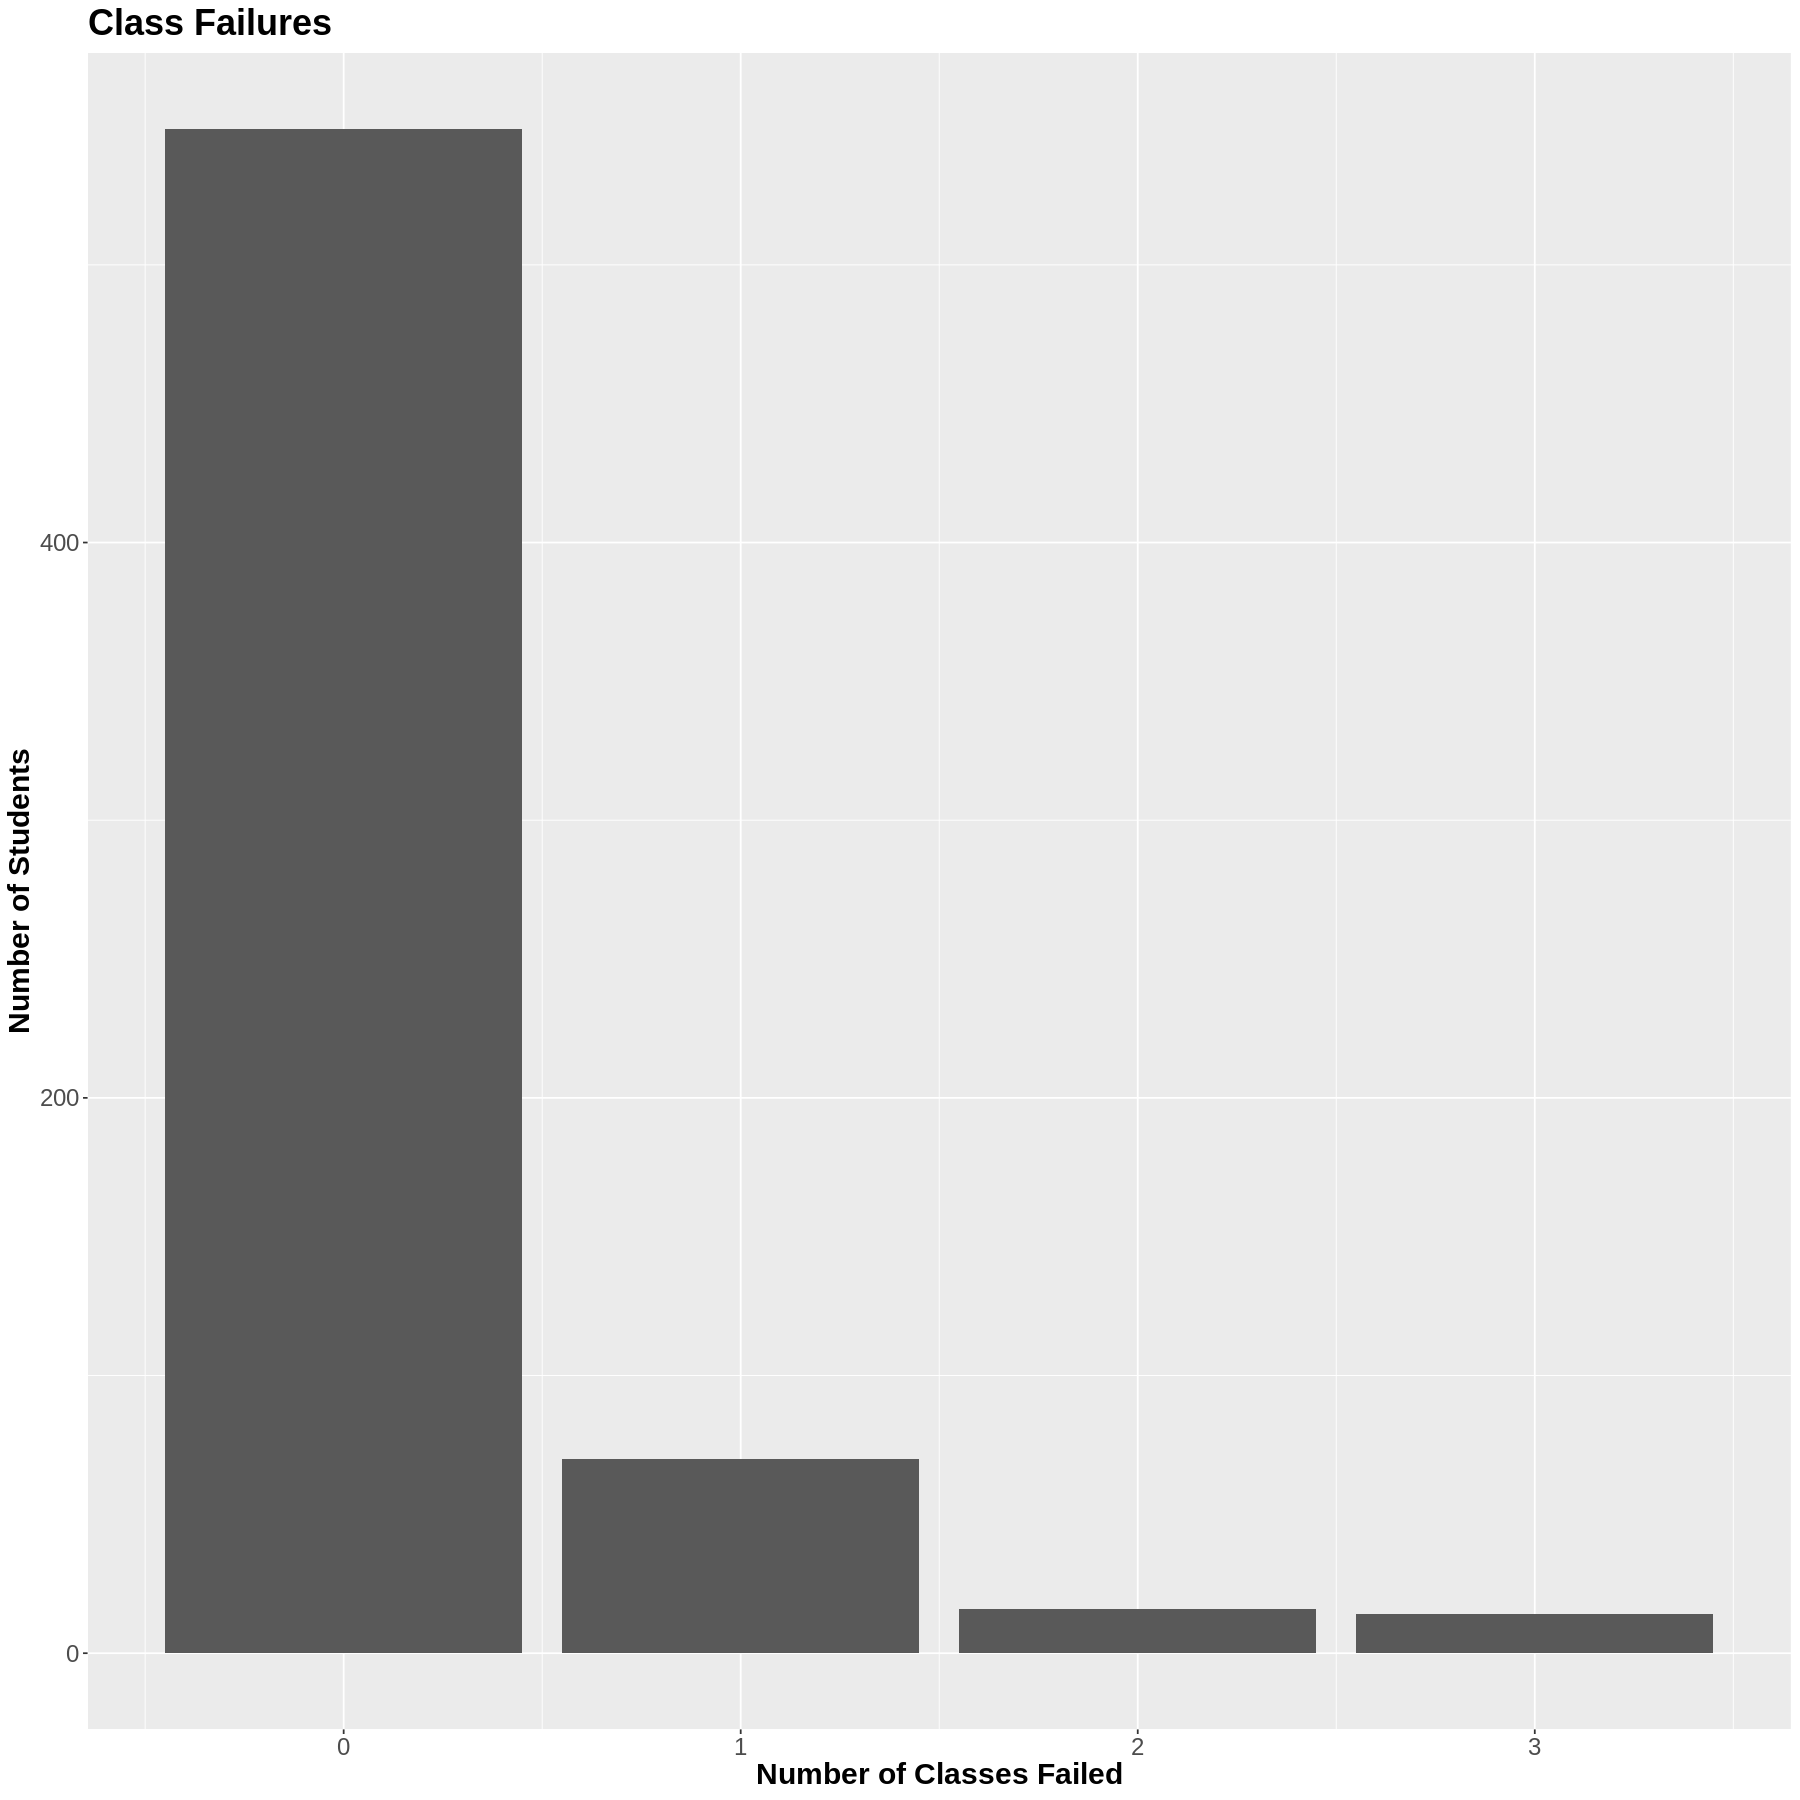

In [27]:
fail_plot <- data_prelim %>%
  ggplot(aes(x = failures)) +
  geom_bar() +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  ) +
  ggtitle("Class Failures") +
  xlab("Number of Classes Failed") +
  ylab("Number of Students")

fail_plot 

Now we are visualizing the number of class failures depending on whether the student is in a relationship or not

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



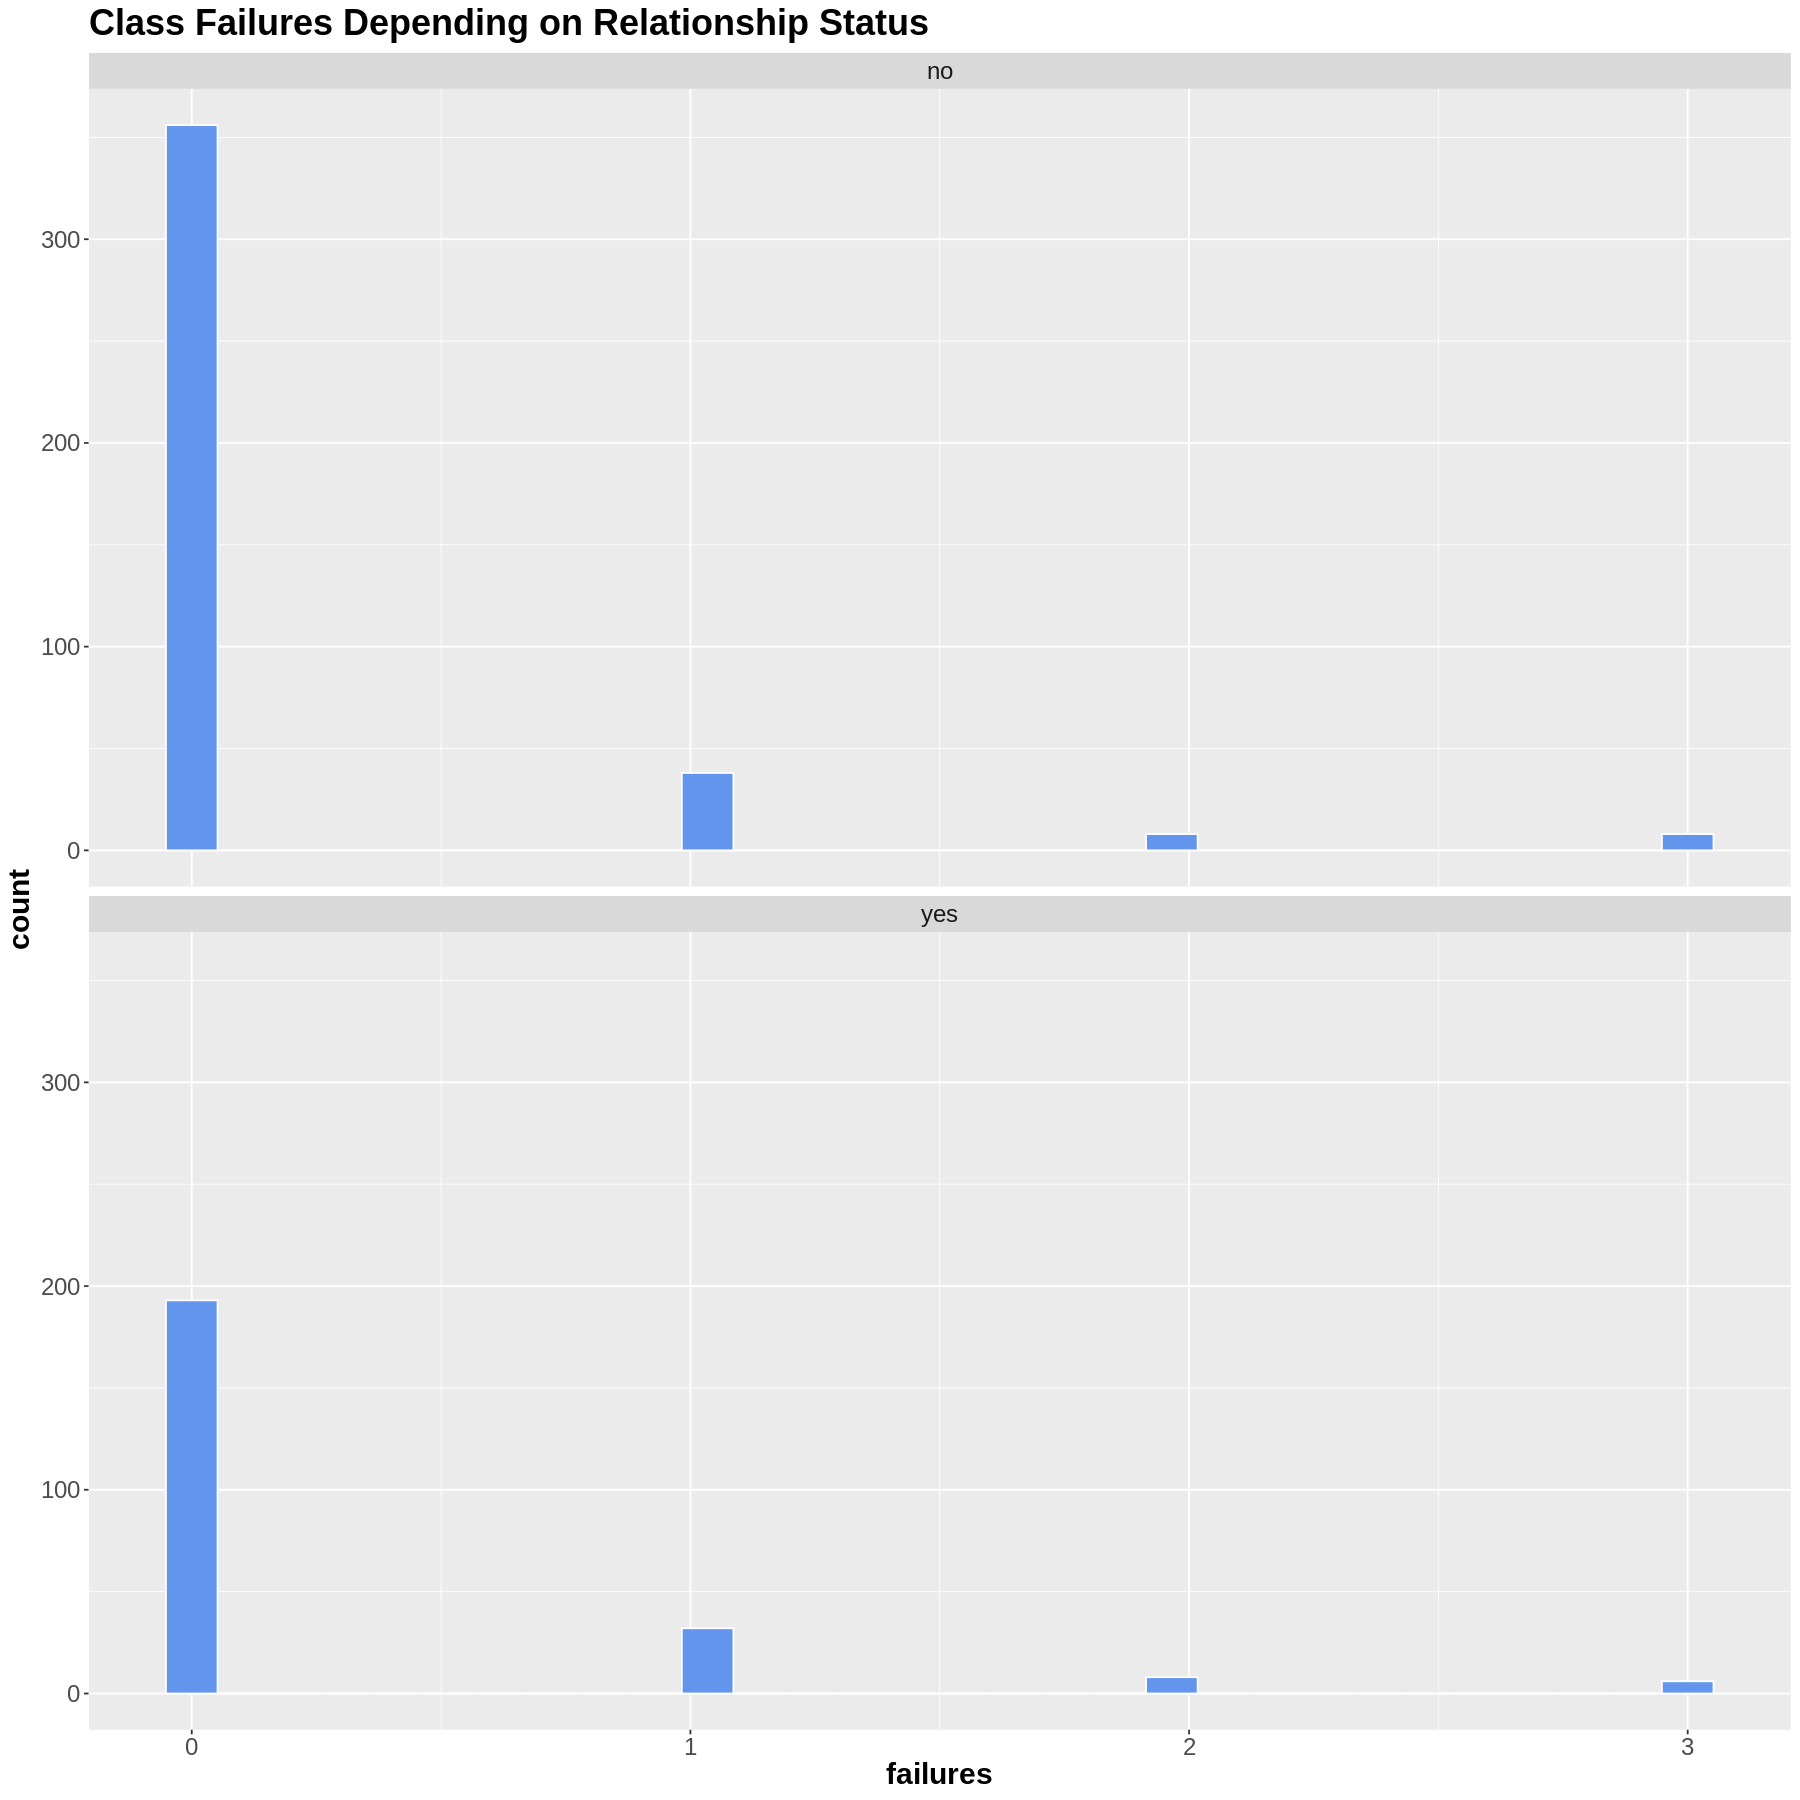

In [32]:
fail_rom_plot <- data_prelim %>%
  ggplot(aes(x = failures)) +
  geom_histogram(fill = "cornflowerblue",
                 color = "white") +
  facet_wrap(~romantic, ncol = 1) +
  labs(title = "Class Failures Depending on Relationship Status") +
  theme(
    text = element_text(size = 18),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )

fail_rom_plot

## 3. Methods ##

The final report will be trustworthy as we diligently and truthfully apply the statistical knowledge and techniques taught in DSCI 100, STAT 201, and STAT 301. Our research, analysis, and communication for this project are and continue to be extensive and thoughtful. The sources that we have used to support our research are peer-reviewed and offer a strong understanding behind the factors affecting student performance.

To accomplish our objective of predicting whether or not a student fails, we begin by implementing stepwise feature selection methods using the regsubsets() and a filter feature selection method using summary() on the now-cleaned data. The consensus of these methods will determine the quantity and choice of variables used. Prior to continuing, we will confirm an absence of multimulticollinearity using a correlation matrix. With a new subset of data that includes the relevant features and the target variable, we will convert the failures variable into a binary variable with a 0 for no failures and a 1 for having one or greater failures. This will yield a minor class imbalance that we will alleviate by upsampling the minority class (students that failed) as the majority class (students that did not fail) outnumber it greatly. We will then split the data into training and testing sets, then fit an a linear model and a kNN model on the training sets. The kNN model will require cross validation to determine the optimal number of neighbors. Using both models we will make predictions on the testing set and use various error metrics to quantify the performance of these models. For each model we will calculate the statistical significance to determine their real-world applicability.

We expect to achieve a model that will accurately predict if a student has any failures. We hope that the impact of our results will be that the main variables that affect student performance will be evident and our model is significant by any metric.

As mentioned in the introduction, the significance of this project is concrete. Many studies such as Shankar et. al (2013) show that education is a key factor in alleviating inequities. If we are able to raise secondary school graduation rates, societies can reap these mentioned benefits.

## References ##

Cortez, P., &amp; Silva, A. (2008). Using data mining to predict secondary school student performance. EUROSIS. 

Klein, M., Sosu, E. M., &amp; Dare, S. (2022). School absenteeism and academic achievement: Does the reason for absence matter? AERA Open, 8, 233285842110711. https://doi.org/10.1177/23328584211071115 

Moos, R. H., &amp; Moos, B. S. (1978). Classroom social climate and student absences and grades. Journal of Educational Psychology, 70(2), 263–269. https://doi.org/10.1037/0022-0663.70.2.263 

Pellerin, L. A. (2005). Student disengagement and the socialization styles of high schools. Social Forces, 84(2), 1159–1179. https://doi.org/10.1353/sof.2006.0027 

Shankar, J., Ip, E., Khalema, E., Couture, J., Tan, S., Zulla, R. T., & Lam, G. (2013). Education as a social determinant of health: issues facing indigenous and visible minority students in postsecondary education in Western Canada. International journal of environmental research and public health, 10(9), 3908–3929. https://doi.org/10.3390/ijerph10093908